# Exploratory Data Visualization (Portfolio Version)

This notebook demonstrates core exploratory data visualization techniques using Python to understand distributions, relationships, and patterns in the dataset.


## What you'll find here
- Univariate plots (distribution of a single variable)
- Bivariate plots (relationship between two variables)
- Practical plotting patterns you can reuse in future analyses


> **Portfolio note:** After each chart, add a short 1–2 sentence interpretation in the *Insight* section.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-02-14 04:49:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  47.7MB/s    in 3.4s    

2026-02-14 04:49:51 (44.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



In [3]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [5]:
import sqlite3
import pandas as pd

# افترض أن df هو DataFrame الأصلي
# مثال: df = pd.read_csv("survey.csv") إذا كانت البيانات من ملف

# 1️⃣ إنشاء / الاتصال بقاعدة بيانات SQLite جديدة
conn = sqlite3.connect('survey-data.sqlite')

# 2️⃣ حذف أي جدول قديم باسم survey_data لتجنب التعارض
conn.execute("DROP TABLE IF EXISTS survey_data;")
conn.commit()

# 3️⃣ حفظ الـ DataFrame في جدول جديد باسم survey_data
df.to_sql('survey_data', conn, if_exists='replace', index=False)

# 4️⃣ التحقق من البيانات - عرض أول 5 صفوف
df_preview = pd.read_sql("SELECT * FROM survey_data LIMIT 5;", conn)
print("Preview of data:")
print(df_preview)

# 5️⃣ التحقق من عدد الصفوف
row_count = pd.read_sql("SELECT COUNT(*) AS total_rows FROM survey_data;", conn)
print("\nTotal rows in survey_data:")
print(row_count)




Preview of data:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                

In [6]:
import sqlite3
import pandas as pd

# افتح اتصال بقاعدة البيانات
conn = sqlite3.connect('survey-data.sqlite')

# استعلام لإظهار أسماء جميع الجداول
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

# عرض أسماء الجداول
print(tables)





          name
0  survey_data


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,survey_data


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM survey_data
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


In [9]:
# NOTE: In SQLite, 'main' is the default schema name, not a table.
# Discover actual table names, then set table_name to a real table.
import sqlite3
import pandas as pd
conn = sqlite3.connect('survey-data.sqlite')  # update if your DB filename differs
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)
print('Available tables:')
display(tables)
table_name = tables['name'].iloc[0] if len(tables) else 'survey_data'
print('Using table:', table_name)


QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


Available tables:


,name
0,survey_data


Using table: survey_data
CREATE TABLE "survey_data" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
 

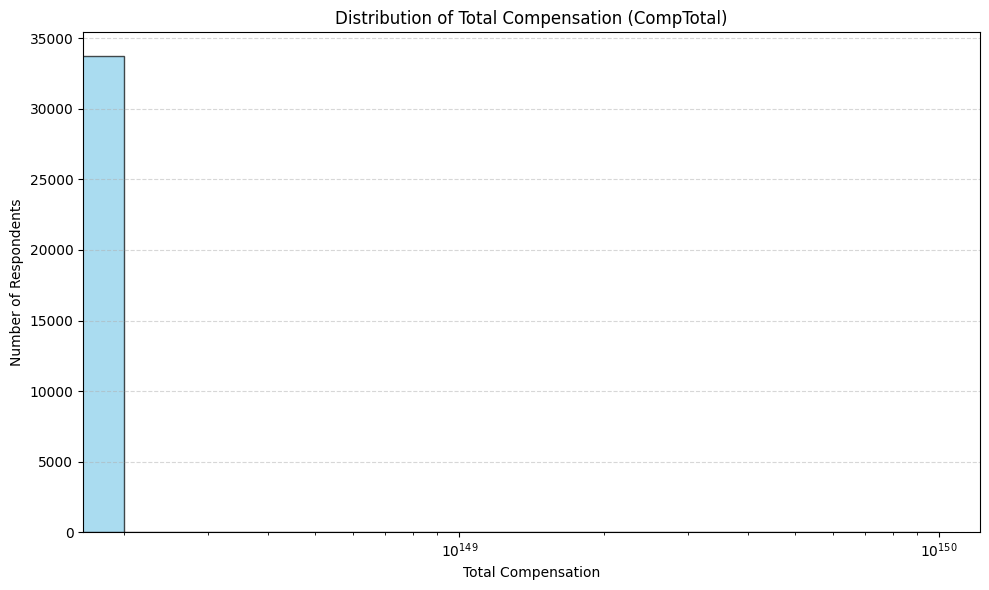

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة العمود CompTotal من قاعدة البيانات
df_comp = pd.read_sql("SELECT CompTotal FROM survey_data WHERE CompTotal IS NOT NULL;", conn)

# تحويل القيم إلى أرقام وتنظيف القيم غير الصالحة
df_comp['CompTotal'] = pd.to_numeric(df_comp['CompTotal'], errors='coerce')
df_comp = df_comp.dropna()

# رسم Histogram
plt.figure(figsize=(10,6))
plt.hist(df_comp['CompTotal'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xscale('log')  # لتسهيل رؤية القيم الكبيرة والمتفاوتة
plt.tight_layout()
plt.show()


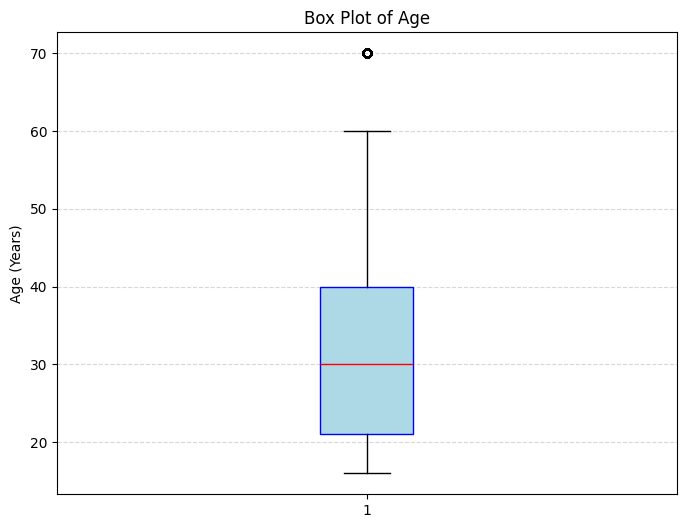

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة العمود Age من قاعدة البيانات
df_age = pd.read_sql("SELECT Age FROM survey_data WHERE Age IS NOT NULL;", conn)

# تحويل الأعمار من categorical إلى أرقام تقريبية (مثال على متوسط الفئة)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_age['AgeNumeric'] = df_age['Age'].map(age_map)
df_age = df_age.dropna()  # إزالة الصفوف التي لا تحتوي على قيمة

# رسم Box Plot
plt.figure(figsize=(8,6))
plt.boxplot(df_age['AgeNumeric'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Age')
plt.ylabel('Age (Years)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


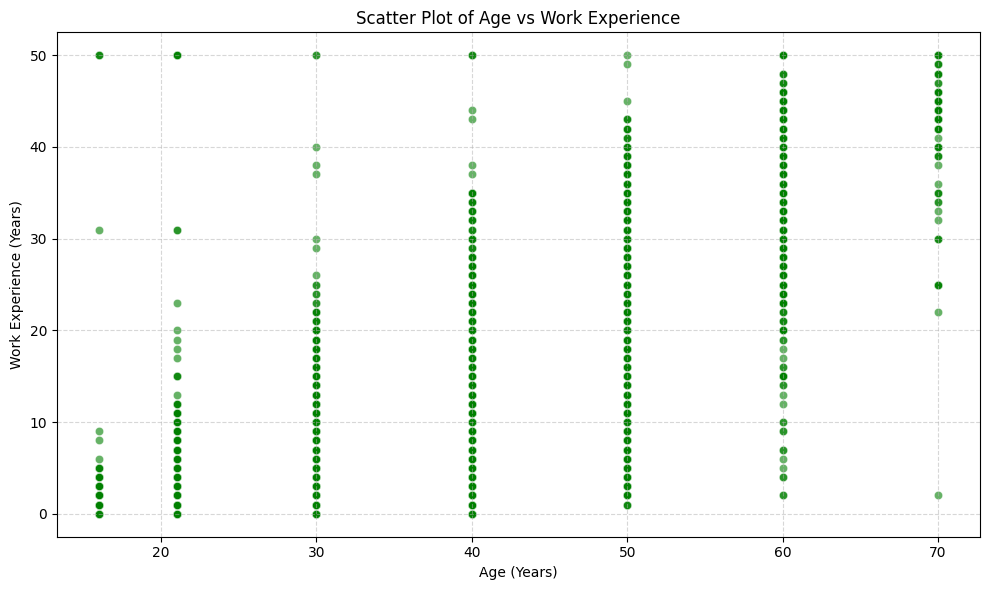

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة الأعمدة من قاعدة البيانات
df_scatter = pd.read_sql("SELECT Age, WorkExp FROM survey_data WHERE Age IS NOT NULL AND WorkExp IS NOT NULL;", conn)

# تحويل الأعمار من categorical إلى أرقام تقريبية
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_scatter['AgeNumeric'] = df_scatter['Age'].map(age_map)
df_scatter = df_scatter.dropna()  # إزالة الصفوف بدون عمر أو خبرة

# تحويل WorkExp إلى رقم (إذا كان نص)
df_scatter['WorkExp'] = pd.to_numeric(df_scatter['WorkExp'], errors='coerce')
df_scatter = df_scatter.dropna()

# رسم Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(df_scatter['AgeNumeric'], df_scatter['WorkExp'], alpha=0.6, color='green', edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (Years)')
plt.ylabel('Work Experience (Years)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


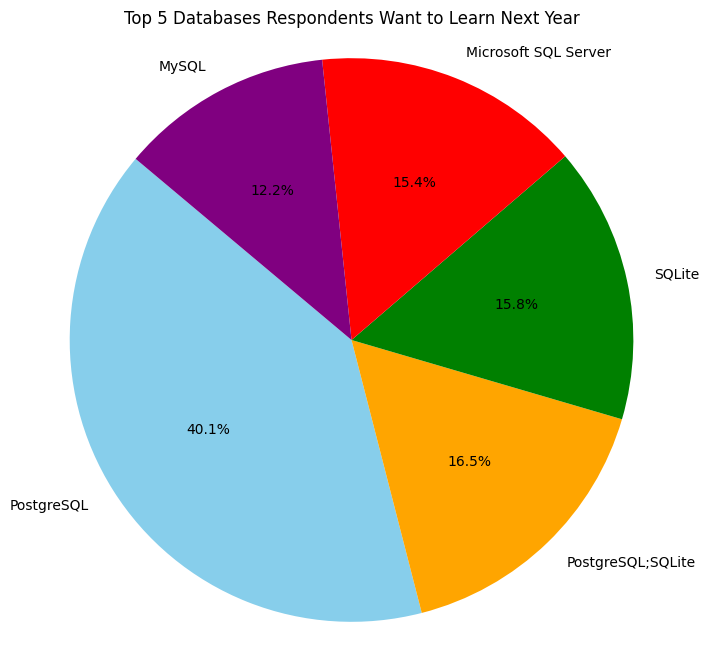

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة العمود من قاعدة البيانات
df_db = pd.read_sql("""
    SELECT DatabaseWantToWorkWith
    FROM survey_data
    WHERE DatabaseWantToWorkWith IS NOT NULL
""", conn)

# حساب التكرارات وأخذ أعلى 5 قواعد بيانات
top5_dbs = df_db['DatabaseWantToWorkWith'].value_counts().head(5)

# رسم Pie Chart
plt.figure(figsize=(8,8))
plt.pie(
    top5_dbs,
    labels=top5_dbs.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue','orange','green','red','purple']
)
plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.axis('equal')  # لتكون الدائرة مثالية
plt.show()


/tmp/ipython-input-1064609912.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompTotal'] = pd.to_numeric(df_filtered['CompTotal'], errors='coerce')


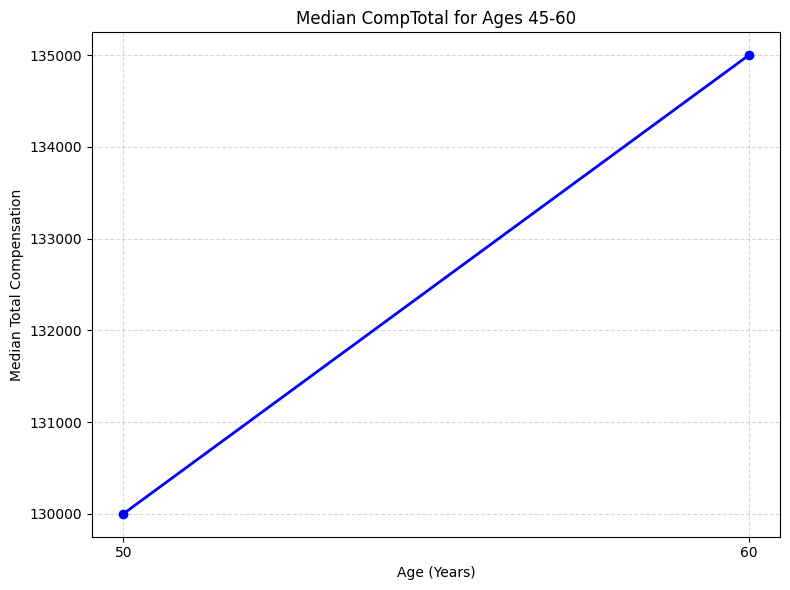

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة الأعمدة المطلوبة من قاعدة البيانات
df_line = pd.read_sql("""
    SELECT Age, CompTotal
    FROM survey_data
    WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
""", conn)

# تحويل الأعمار من categorical إلى أرقام تقريبية
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_line['AgeNumeric'] = df_line['Age'].map(age_map)
df_line = df_line.dropna()

# تصفية الأعمار بين 45 و 60
df_filtered = df_line[(df_line['AgeNumeric'] >= 45) & (df_line['AgeNumeric'] <= 60)]

# تحويل CompTotal إلى رقم
df_filtered['CompTotal'] = pd.to_numeric(df_filtered['CompTotal'], errors='coerce')
df_filtered = df_filtered.dropna()

# حساب الوسيط لكل فئة عمرية
median_comp = df_filtered.groupby('AgeNumeric')['CompTotal'].median()

# رسم Line Chart
plt.figure(figsize=(8,6))
plt.plot(median_comp.index, median_comp.values, marker='o', color='blue', linewidth=2)
plt.title('Median CompTotal for Ages 45-60')
plt.xlabel('Age (Years)')
plt.ylabel('Median Total Compensation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(median_comp.index)  # إظهار كل الفئات العمرية
plt.tight_layout()
plt.show()


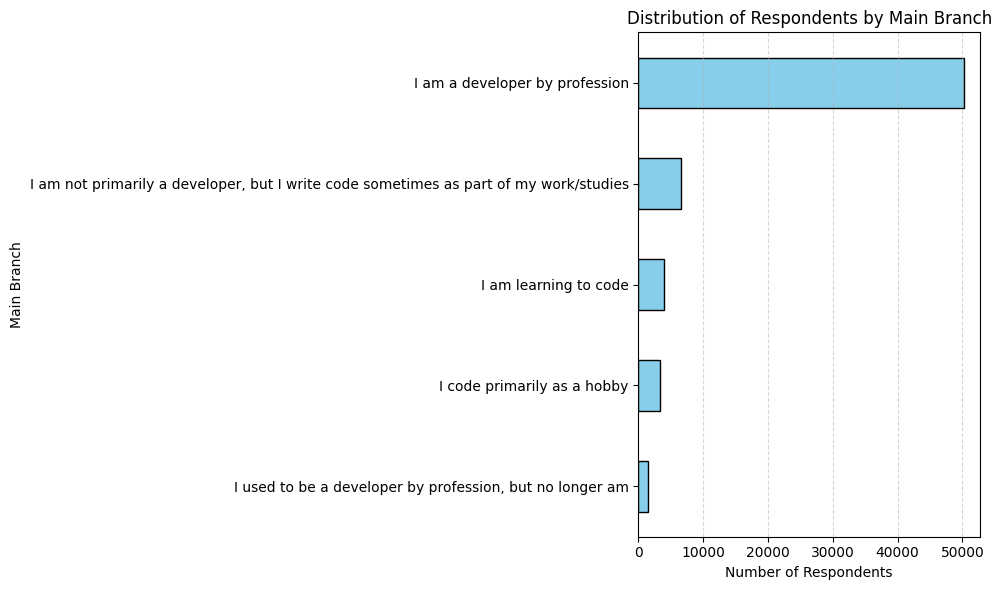

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة العمود MainBranch من قاعدة البيانات
df_branch = pd.read_sql("""
    SELECT MainBranch
    FROM survey_data
    WHERE MainBranch IS NOT NULL
""", conn)

# حساب عدد المستجيبين لكل مسار
branch_counts = df_branch['MainBranch'].value_counts()

# رسم Horizontal Bar Chart
plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Distribution of Respondents by Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.gca().invert_yaxis()  # ترتيب الأعلى قيمة في الأعلى
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [18]:
conn.close()